In [1]:
import batterycharger as bc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import seaborn as sns

plt.style.use('seaborn')

In [2]:
ichargermax=6.5
padaptor=60
psystem=15
soc=0.1

In [3]:
soclist = np.arange(0,1,0.01) #[0.01, 0.5, 0.95]
syspwr = np.arange(0,50,5)
adptr = [45,60,90]
imx = [6,7,8,9]

In [4]:
data = [bc.Charger(bc.Adaptor(padaptor,20),bc.Battery(2,50,soc=s),psystem=psystem, imax=ichargermax).charger_state for s in soclist]
frame=pd.DataFrame(data,index=soclist,columns=['Pout','Ibat','Vsys','Iout'])
frame.index.name='soc'

data2 = [bc.Charger(bc.Adaptor(padaptor,20),bc.Battery(2,50,soc=soc),psystem=p, imax=ichargermax).charger_state for p in syspwr]
frame2=pd.DataFrame(data2,index=syspwr,columns=['Pout','Ibat','Vsys','Iout'])
frame2.index.name='psys'


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025E9FD3F588>,
      dtype=object)

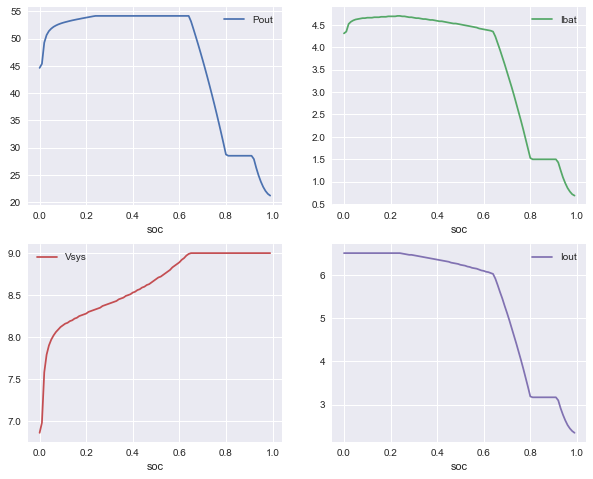

In [5]:
frame.plot(subplots=True, layout=(2,2),figsize=(10,8),sharex=False,use_index=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025EA04786A0>,
      dtype=object)

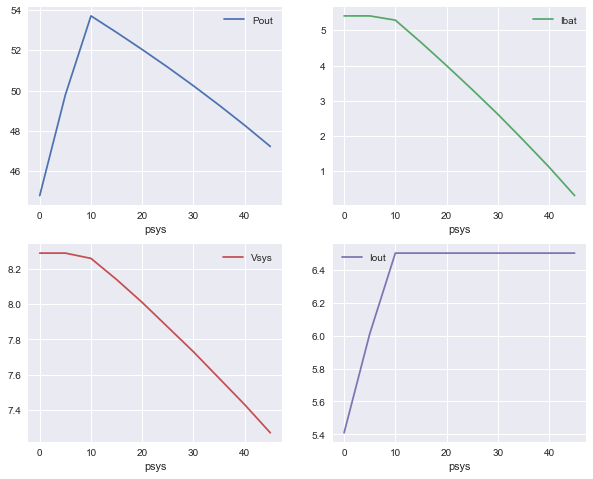

In [6]:
frame2.plot(subplots=True, layout=(2,2),figsize=(10,8),sharex=False,use_index=True)

In [24]:
data3=bc.batterystate_vs_t(bc.Charger(bc.Adaptor(padaptor,20),bc.Battery(2,50,soc=soc),psystem=psystem, imax=ichargermax))
frame3=pd.DataFrame(np.array(data3[1:]).T,index=data3[0],columns=['soc','pout','vbat','vsys','iout','icharge'])
frame3.index.name='time(hr)'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025EA0462A90>,
      dtype=object)

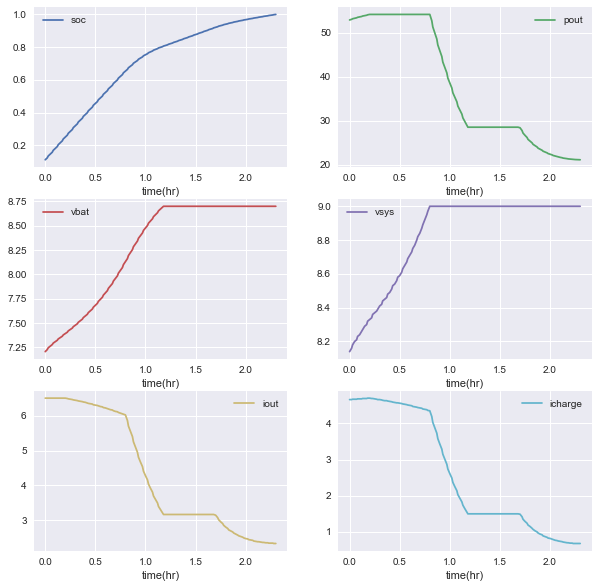

In [8]:
frame3.plot(subplots=True, layout=(3,2),figsize=(10,10),sharex=False,use_index=True)

In [27]:
data4=[]
idx_array=[]
for s in syspwr:
    for a in adptr:
        idx_array.append([a,s])
        datacol=[]
        for i in imx:
            datacol.append(bc.chargetime(padaptor=a,psystem=s,imax=i))
        data4.append(datacol)

In [10]:
idx=pd.MultiIndex.from_product([syspwr,adptr],names=['Syspwr','Padaptor'])

In [11]:
frame4=pd.DataFrame(data4,index=idx,columns=imx)

In [12]:
frame4

6     7     8     9
Syspwr Padaptor                        
0      45        2.40  2.40  2.40  2.40
       60        2.30  2.30  2.30  2.30
       90        2.30  2.30  2.30  2.30
5      45        2.50  2.50  2.50  2.50
       60        2.30  2.30  2.30  2.30
       90        2.30  2.30  2.30  2.30
10     45        2.67  2.67  2.67  2.67
       60        2.40  2.33  2.33  2.33
       90        2.40  2.30  2.30  2.30
15     45        2.90  2.90  2.90  2.90
       60        2.52  2.42  2.42  2.42
       90        2.52  2.33  2.30  2.30
20     45        3.27  3.27  3.27  3.27
       60        2.72  2.55  2.55  2.55
       90        2.72  2.43  2.30  2.30
25     45        3.90  3.88  3.88  3.88
       60        3.00  2.73  2.73  2.73
       90        3.00  2.58  2.35  2.30
30     45        5.28  5.28  5.28  5.28
       60        3.52  3.00  3.00  3.00
       90        3.52  2.80  2.47  2.30
35     45        9.57  9.53  9.53  9.53
       60        4.60  3.45  3.42  3.42
       90        4.60  3.17  2.65  2.38
40     45        9.98  9.98  9.98  9.98
       60        9.98  4.30  4.17  4.17
       90        9.98  3.88  2.92  2.53
45     45        9.98  9.98  9.98  9.98
       60        9.98  9.98  6.03  6.02
       90        9.98  9.98  3.40  2.73

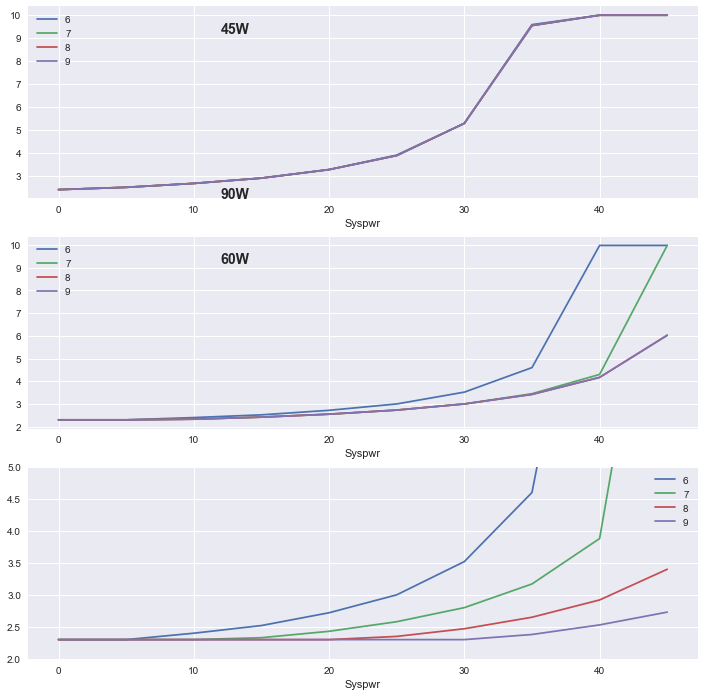

In [13]:
f, a = plt.subplots(3,1)
frame4.xs(45,level=1).plot(ax=a[0],figsize=(12,12))
frame4.xs(60,level=1).plot(ax=a[1])
frame4.xs(90,level=1).plot(ax=a[2])
a[2].set_ylim([2,5])
for i in range(len(adptr)):
    text=str(adptr[i])+'W'
    a[i].text(12,9.2,text,fontsize=14,fontweight='bold')
plt.show()

In [14]:
help(pd)

Help on package pandas:

NAME
    pandas

DESCRIPTION
    pandas - a powerful data analysis and manipulation library for Python
    
    **pandas** is a Python package providing fast, flexible, and expressive data
    structures designed to make working with "relational" or "labeled" data both
    easy and intuitive. It aims to be the fundamental high-level building block for
    doing practical, **real world** data analysis in Python. Additionally, it has
    the broader goal of becoming **the most powerful and flexible open source data
    analysis / manipulation tool available in any language**. It is already well on
    its way toward this goal.
    
    Main Features
    -------------
    Here are just a few of the things that pandas does well:
    
      - Easy handling of missing data in floating point as well as non-floating
        point data.
      - Size mutability: columns can be inserted and deleted from DataFrame and
        higher dimensional objects
      - Automatic an

In [15]:
help(pd.plotting)

Help on package pandas.plotting in pandas:

NAME
    pandas.plotting - Plotting api

PACKAGE CONTENTS
    _compat
    _converter
    _core
    _misc
    _style
    _timeseries
    _tools

DATA
    plot_params = {'xaxis.compat': False}

FILE
    c:\programdata\anaconda3\lib\site-packages\pandas\plotting\__init__.py


